In [1]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import random
# зафиксируем сид для воспроизводимости генерации
SEED = 207
np.random.seed(SEED)
random.seed(SEED)

## Критерии вида t-test

### Одновыборочный

Дана одна нормальная выборка $X_1, ..., X_n \sim \mathcal{N}(a, \sigma^2)$.

Критерий проверяет гипотезы

$\mathsf{H}_0\colon a = a_0$

$\mathsf{H}_1\colon a \not= a_0$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp">`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

* `a` &mdash; выборка
* `popmean` &mdash; равно $a_0$

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и с помощью критерия проверьте:
- равенство среднего нулю 
- равенство среднего 0.5

In [2]:
size=100

sample = sps.norm.rvs(size=size)
print(sps.ttest_1samp(a=sample, popmean=0.5))

TtestResult(statistic=-4.752709317148305, pvalue=6.81033644569793e-06, df=99)


### Двухвыборочный

#### Независимые выборки

Даны две независимые нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` &mdash; выборка

`equal_var` &mdash; известно ли равенство дисперсий

Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 1)$. Используя критерий, проверьте равенство средних двух выборок.

In [3]:
n = 100
m = 200

sample_1 = sps.norm.rvs(loc=0, scale=1, size=n)
sample_2 = sps.norm.rvs(loc=1, scale=1, size=m)

print(sps.ttest_ind(a=sample_1, b=sample_2, equal_var=True))

TtestResult(statistic=-6.609569064444994, pvalue=1.7759607142436027e-10, df=298.0)


Сгенерируйте выборки $X_1, ..., X_n \sim \mathcal{N}(0, 1)$ и $X_1, ..., X_m \sim \mathcal{N}(1, 7)$. Используя критерий, проверьте равенство средних двух выборок.

In [4]:
sample_1 = sps.norm.rvs(loc=0, scale=1, size=n)
sample_2 = sps.norm.rvs(loc=1, scale=np.sqrt(7), size=m)

print(sps.ttest_ind(a=sample_1, b=sample_2, equal_var=False))

TtestResult(statistic=-4.840632218734482, pvalue=2.1461674962264823e-06, df=278.98462221010345)


#### Связные выборки

Даны две связные нормальные выборки

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_n \sim \mathcal{N}(a_2, \sigma_2^2)$.


Критерий проверяет для их гипотезы о равенстве среднего:

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` &mdash; выборка

Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [5]:
n = 1000

X = sps.norm.rvs(loc=0, scale=1, size=n)
noise = sps.norm.rvs(loc=0, scale=0.5, size=n)

print(sps.ttest_rel(a=X, b=X+noise))

TtestResult(statistic=0.931223993170257, pvalue=0.3519626901750348, df=999)


Сгенерируйте выборку $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Вторую сгенерируйте по формуле выборка_1 + случайный шум, случайный шум из  $\mathcal{N}(0.5, 0.5)$. Используя критерий, проверьте гипотезу о равенстве среднего.

In [6]:
n = 1000

X = sps.norm.rvs(loc=0, scale=1, size=n)
noise = sps.norm.rvs(loc=0.5, scale=0.5, size=n)

print(sps.ttest_rel(a=X, b=X+noise))

TtestResult(statistic=-31.304958399710625, pvalue=1.830030687482165e-150, df=999)


Везде где pvalue < 0.05 я считаю, что гипотеза опровергается. Все результаты примеров выше соответствуют здравому смыслу

### Пример: ирисы Фишера

Визуализация данных

/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/home/egor/repoes/data_sc

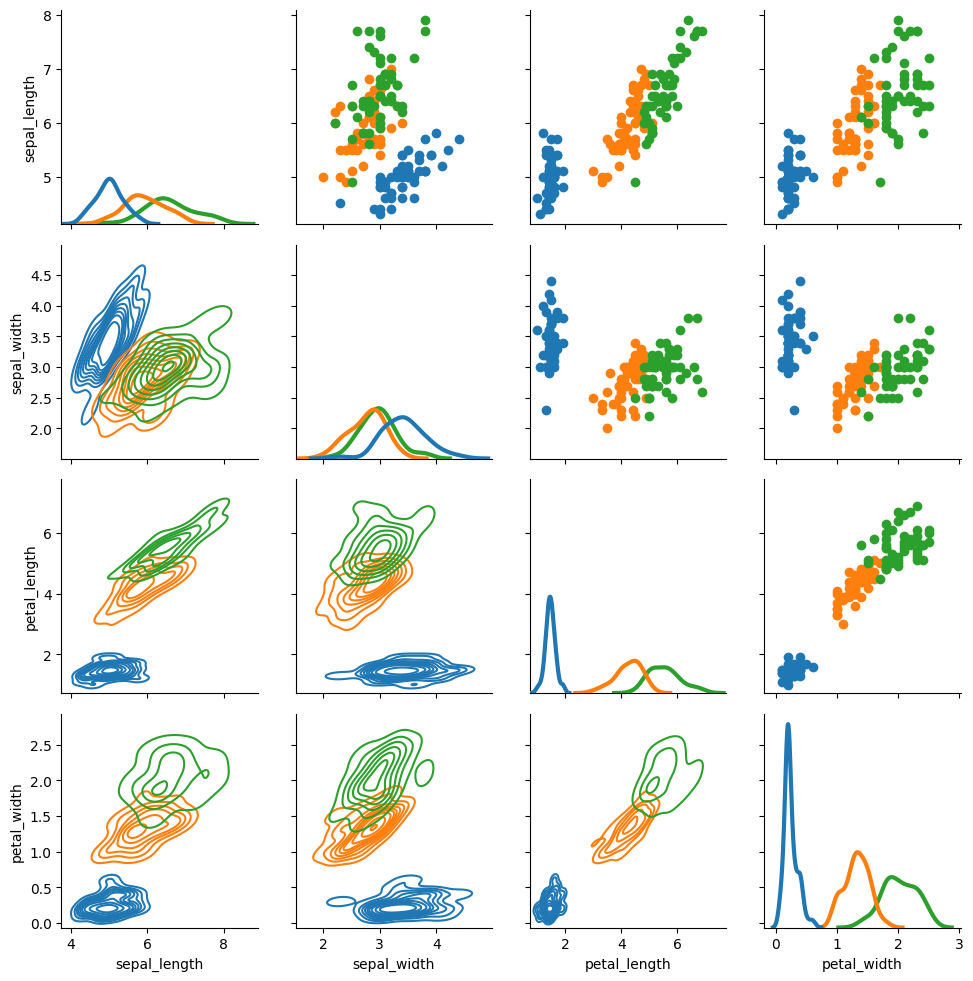

In [7]:
df = sns.load_dataset("iris")

g = sns.PairGrid(df, hue='species')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Как выглядят данные

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Виды ирисов

In [9]:
np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
sps.ttest_ind(df[df.species == 'setosa'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

TtestResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17, df=86.53800179765497)

In [11]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_length, 
              df[df.species == 'versicolor'].sepal_length,
              equal_var=False)

TtestResult(statistic=5.629165259719801, pvalue=1.8661443873771216e-07, df=94.02548633776483)

In [12]:
sps.ttest_ind(df[df.species == 'virginica'].sepal_width, 
              df[df.species == 'versicolor'].sepal_width,
              equal_var=False)

TtestResult(statistic=3.2057607502218186, pvalue=0.001819483482104968, df=97.92682669979344)

*Замечание.* Строго говоря, неоходима поправка на множественное тестирование гипотез.

**Вывод** С высокой уверенностью мы можем сказать, что у вида "setosa" и "versicolor" среднее параметра sepal_length не совпадает, также с высокой уверенностью "virginica" и "versicolor" тоже не совпадают. 
Однако у 'virginica' и 'versicolor' мы считаем что параметр sepal_width не совпадает, хотя увереность в этом сильно меньше чем в сравнение с предыдущим признаком.

## Множественная проверка гипотез

С помощью статистических методов можно проверить человека на наличие экстрасенсорных способностей: предложим ему угадать последовательность, состоящую из двух цветов, длины 100. 

Сформулируем задачу на статистическом языке: 

$X_1...X_{100}$ &mdash; выборка из распределения $Bern(p)$

$p=0.5$ отвечает случайному угадыванию.

Проверьте гипотезу: $\mathsf{H}_0 \colon p=0.5$ vs $\mathsf{H}_1 \colon p \neq 0.5$. Используйте критерий Вальда.

В качестве асимптотически нормальной оценки можно использовать $\widehat{p} = \overline{X}$ с асимптотической дисперсией $\sigma^2(p) = p (1 - p)$.

Выпишем состоятельную оценку дисперсии и статистику критерия Вальда:

$\widehat{\sigma} = \sqrt{\overline{X} (1 - \overline{X})}$, $W = \sqrt{n} \frac{\overline{X} - 0.5}{\sqrt{\overline{X} (1 - \overline{X})}}$

Оценим реальный уровень значимости для этого критерия при размере выборки равном 100. К чему он должен быть близок? Для скорости вычислений используйте количество выборок равное $10^3$.

In [13]:
sample_size = 100
sample_count = 1000

theta = 0.5

In [14]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma
    param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    """

    alpha = 0.05
    z = sps.norm.ppf(1 - alpha/2)
    n = len(sample)
    statistic = np.sqrt(n) * (estimation_theta - theta) / estimation_sigma

    if alternative == 'two_sided':
        p_value = sps.norm.sf(np.abs(statistic)) + sps.norm.cdf(-np.abs(statistic))
        conf_int = round(estimation_theta - z*estimation_sigma/np.sqrt(n), 4), round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4)


    elif alternative == 'less':
        p_value = sps.norm.cdf(statistic)
        conf_int = (-np.inf, round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4))

    
    elif alternative == 'greater':
        p_value = sps.norm.sf(statistic)
        conf_int = (round(estimation_theta + z*estimation_sigma/np.sqrt(n), 4), np.inf)

    else:
        raise ValueError('alternative name is wrong')

    return statistic, p_value, conf_int

Оценим реальный уровень значимости

In [15]:
sample = sps.bernoulli.rvs(p=theta, size=(sample_count, sample_size))

estimation_theta = np.mean(sample, axis=1)
estimation_sigma = np.sqrt((estimation_theta * (1 - estimation_theta)))

alpha = 0.05
counter = 0

for i in range(sample_count):
    _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
    is_rejected = conf_int[0] < theta < conf_int[1]
    if is_rejected:
        counter += 1
        
counter / sample_count


0.942

Теперь представим, что мы хотим проверить большое количество людей на экстрасенсорные способности с помощью данного критерия.

Проведите аналогичный эксперимент: сгенерируйте $10^3$ выборок размера $100$ для $100$ людей. Посчитайте, сколько раз из 1000 в вашем наборе из 100 выборок хотя бы для одной гипотеза будет отвергнута. 

In [16]:
alpha = 0.05

sample_count = 1000
sample_size = 100
people_count = 100

sample_all = sps.bernoulli.rvs(p=0.5, size=(sample_count, sample_size, people_count))


counter = 0
for sample in sample_all:
    estimation_theta = np.mean(sample, axis=1)
    estimation_sigma = np.sqrt((estimation_theta * (1 - estimation_theta)))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = conf_int[0] < theta < conf_int[1]
        if is_rejected:
            counter += 1
            break

In [17]:
counter / 1000

1.0

**Вывод:** В каждом эксперименте найдется человек который правильно угадал "орел" это или "решка"

На лекции вы прошли метод, позволяющий не накапливать ошибку 1 рода. В этом методе необходимо использовать уровень значимости, зависящий от количества проверяемых одновременно гипотез. 

**Чему равен этот уровень значимости, если одновременно проверяются n гипотез?**

**Ответ:** $\alpha / n$

Проведите предыдущий эксперимент с использованием корректной процедуры. Поскольку в реализованной выше функции $\alpha$ зафиксировано, используйте критерий отвержения гипотезы с помощью p-value.

In [22]:
sample_all = sps.bernoulli.rvs(p=0.5, size=(sample_count, sample_size, people_count))

counter = 0
for sample in sample_all:
    estimation_theta = np.mean(sample, axis=1)
    estimation_sigma = np.sqrt((estimation_theta * (1 - estimation_theta)))

    for i in range(100):
        _, p_value, conf_int = wald_test(sample[i], theta, estimation_theta[i], estimation_sigma[i])
        is_rejected = p_value < alpha/100
        if is_rejected:
            counter += 1
            break        

In [21]:
counter / 1000

0.02

**Вывод:** доля экстрасенсов уменьшилась так как мы учли то, что в предыдущем эксперименте набегала ошибка. В последнем эксперименте, мы уменьшили эту ошибку путем деления альфы на количество людей. То есть реальное колличсетво экстрасенсов стало меньше.